# Wine
Usando análise química para determinar a origem dos vinhos

Classificação
## Dados
Estes dados são o resultado de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

In [257]:
# Importando Bibliotecas para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [258]:
# Modelo de Rede Neural MLP
class WineClassifier(nn.Module) :
    def __init__(self, input_size = 13, hidden_size1=130, hidden_size2 = 70, hidden_size3 = 40, hidden_size4=13, output_size = 3) :
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.output = nn.Linear(hidden_size4, output_size)
        self.relu = nn.ReLU()

    def forward(self, data) :
        data = self.relu(self.fc1(data))
        data = self.relu(self.fc2(data))
        data = self.relu(self.fc3(data))
        data = self.relu(self.fc4(data))
        data = self.output(data)
        return data


In [259]:
# Introdução e Tratamento de Dados 
inputData = pd.read_csv("./Datasets/wine/wine.data")
data = inputData[inputData.columns[1:]].to_numpy()
labelsTemp = inputData[inputData.columns[0]].to_numpy()
labels = []
for i in range(len(labelsTemp)):
    labels.append(labelsTemp[i] - 1)


data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=41)

In [260]:
# Verificando os dados
data_train = torch.FloatTensor(data_train)
data_test = torch.FloatTensor(data_test)
labels_train = torch.LongTensor(labels_train)
labels_test = torch.LongTensor(labels_test)

print("Dados para Treino : ", len(data_train))
print("Dados para Teste : ", len(data_test))

labels_train


Dados para Treino :  141
Dados para Teste :  36


tensor([0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1,
        2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1,
        2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1,
        0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0,
        2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2,
        2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2])

In [261]:
classificadorMonstro = WineClassifier()
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classificadorMonstro.parameters(), lr=learning_rate)

In [262]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [263]:
#Treinamento
from sklearn.metrics import accuracy_score



def train_network(model, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses) :
    for i in range(num_epochs) :
        optimizer.zero_grad()

        label_train = model.forward(data_train) # Pegando a previsão
        loss_train = criterion(label_train, labels_train)
        loss_train.backward()
        optimizer.step()
        
        label_test = model(data_test)
        loss_test = criterion(label_test, labels_test)
        
        train_losses.append(loss_train.detach().numpy())
        test_losses.append(loss_test.detach().numpy())

        if i%10 == 0 :
            print(f'Época {i}, Erro de Treinamento : {loss_train}, Erro de Teste : {loss_test}')

In [264]:
num_epochs = 200
train_losses = []
test_losses = []
train_network(classificadorMonstro, optimizer, criterion, data_train, labels_train, data_test, labels_test, num_epochs, train_losses, test_losses)

Época 0, Erro de Treinamento : 7.364587783813477, Erro de Teste : 4.731896877288818


Época 10, Erro de Treinamento : 1.173059105873108, Erro de Teste : 1.074087381362915
Época 20, Erro de Treinamento : 0.9148474335670471, Erro de Teste : 1.0092017650604248
Época 30, Erro de Treinamento : 0.8153112530708313, Erro de Teste : 0.9349772334098816
Época 40, Erro de Treinamento : 0.676167905330658, Erro de Teste : 0.7688043117523193
Época 50, Erro de Treinamento : 0.627937912940979, Erro de Teste : 0.6875520348548889
Época 60, Erro de Treinamento : 0.6106381416320801, Erro de Teste : 0.6770519018173218
Época 70, Erro de Treinamento : 0.5945911407470703, Erro de Teste : 0.6761361360549927
Época 80, Erro de Treinamento : 0.5815701484680176, Erro de Teste : 0.6578446626663208
Época 90, Erro de Treinamento : 0.5659352540969849, Erro de Teste : 0.6366807222366333
Época 100, Erro de Treinamento : 0.550839364528656, Erro de Teste : 0.6247589588165283
Época 110, Erro de Treinamento : 0.5142032504081726, Erro de Teste : 0.49058130383491516
Época 120, Erro de Treinamento : 0.4567117393

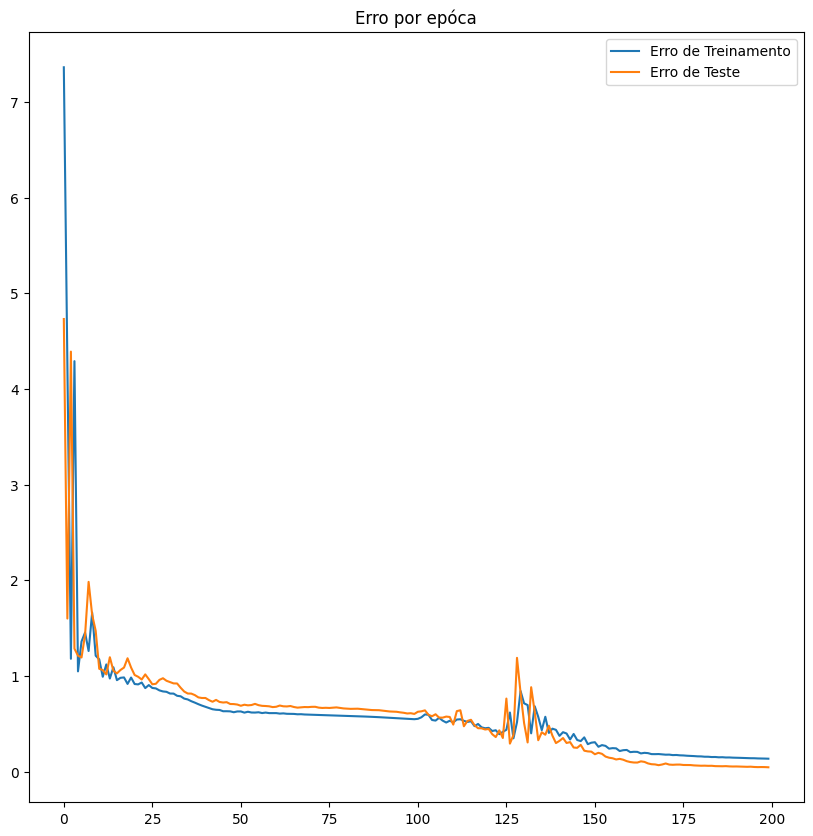

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(test_losses, label='Erro de Teste')
plt.title("Erro por epóca")
plt.legend()
plt.show()

In [266]:
import operator
data_testp = torch.FloatTensor(data_test[0])
label_testp = torch.LongTensor(labels_test[0])
output = classificadorMonstro(data_testp)

logits = torch.nn.functional.softmax(output, dim=-1) * 100
categories = ['Classe 0', 'Classe 1', 'Classe 2']
prob_dict = {}

for i, classname in enumerate(categories):
  prob = logits[i]
  prob_dict[classname] = prob

result = max(prob_dict.items(), key=operator.itemgetter(1))
print(f'Resultado Calculado : {result[0]}')
print(f'Resultado Esperado : {categories[label_testp]}')

Resultado Calculado : Classe 1
Resultado Esperado : Classe 1


In [267]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = classificadorMonstro(data_train)
    predictions_test = classificadorMonstro(data_test)

train_acc = get_accuracy_multiclass(predictions_train,labels_train)
test_acc  = get_accuracy_multiclass(predictions_test,labels_test)
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 94.326
Test Accuracy: 100.0
